Import libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading dataset

In [38]:

# Load the dataset from your folder
df = pd.read_csv('diabetes.csv')

# Display the first  rows to verify
print(df.head(780))

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

Checking shape of dataset Missing values and Statistics

In [39]:
# Check the shape of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# Check column names
print("Columns in the dataset:", df.columns)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Basic statistics
print("Dataset statistics:\n", df.describe())

Shape of the dataset: (768, 9)
Columns in the dataset: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
Missing values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Dataset statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%    

In [46]:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


identifiy ourliers

In [47]:
# Function to identify outliers using IQR
def identify_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Identify outliers for each numerical column
numerical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outliers = {}

for col in numerical_columns:
    outliers[col] = identify_outliers(df[col])
    print(f"Outliers in {col}: {len(outliers[col])}")

Outliers in Glucose: 5
Outliers in BloodPressure: 45
Outliers in SkinThickness: 1
Outliers in Insulin: 34
Outliers in BMI: 19
Outliers in DiabetesPedigreeFunction: 29
Outliers in Age: 9


Before Handaling Outliers

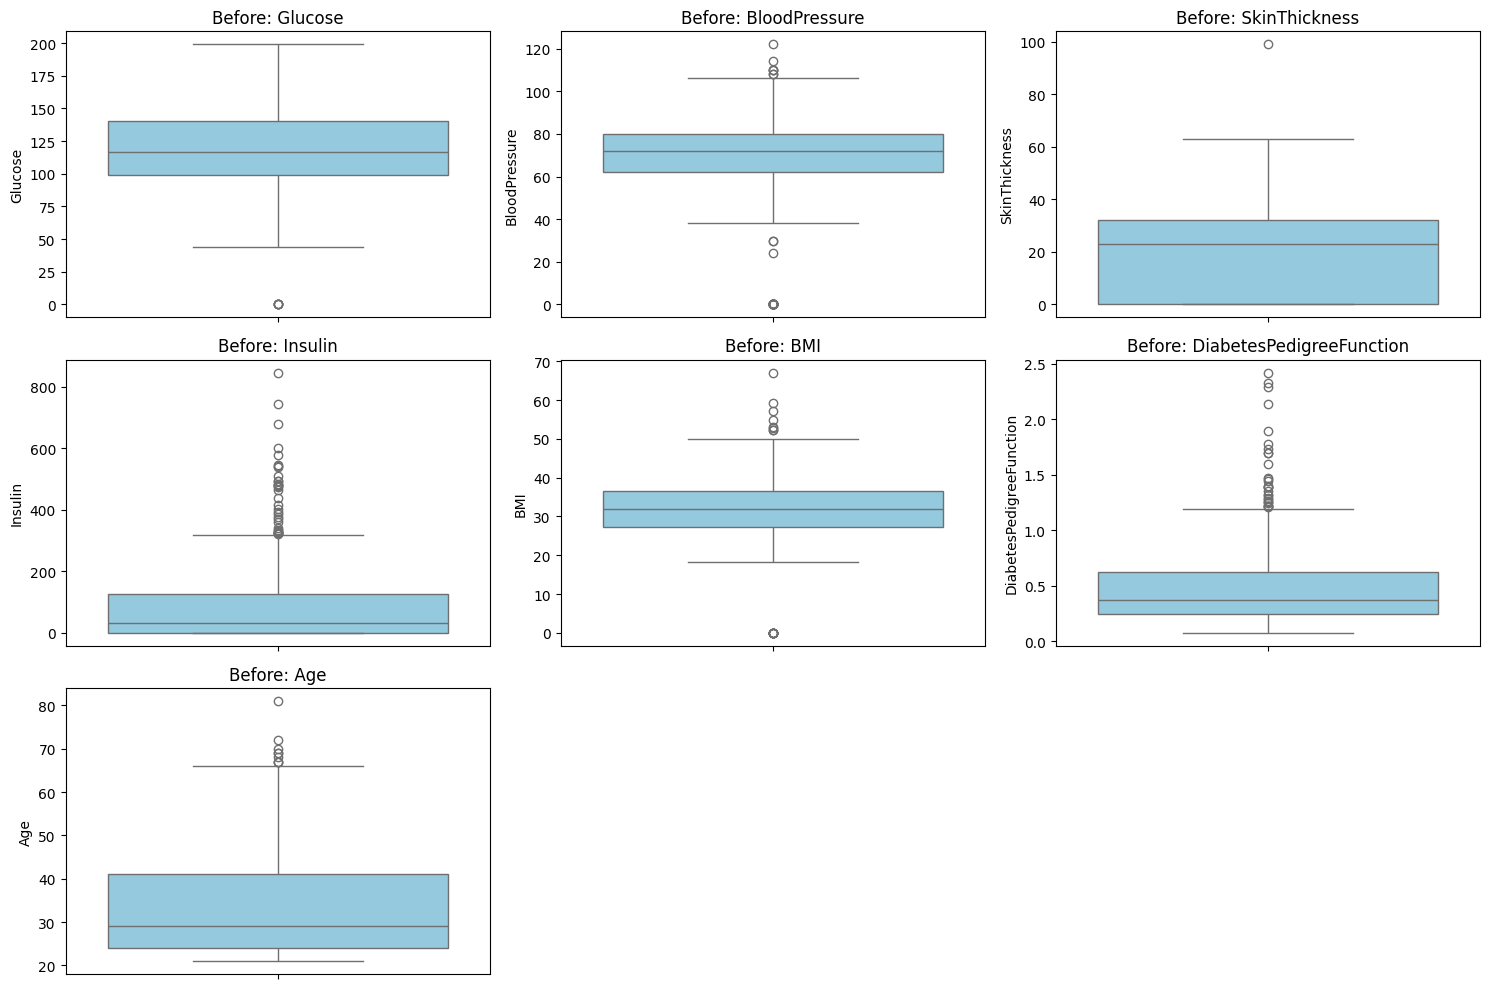

In [48]:
# Box plots before handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Before: {col}')
plt.tight_layout()
plt.show()

After handaling Outliers

In [50]:
# Function to cap/floor outliers
def handle_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

# Handle outliers for each numerical column
df_cleaned = df.copy()
for col in numerical_columns:
    df_cleaned[col] = handle_outliers(df[col])

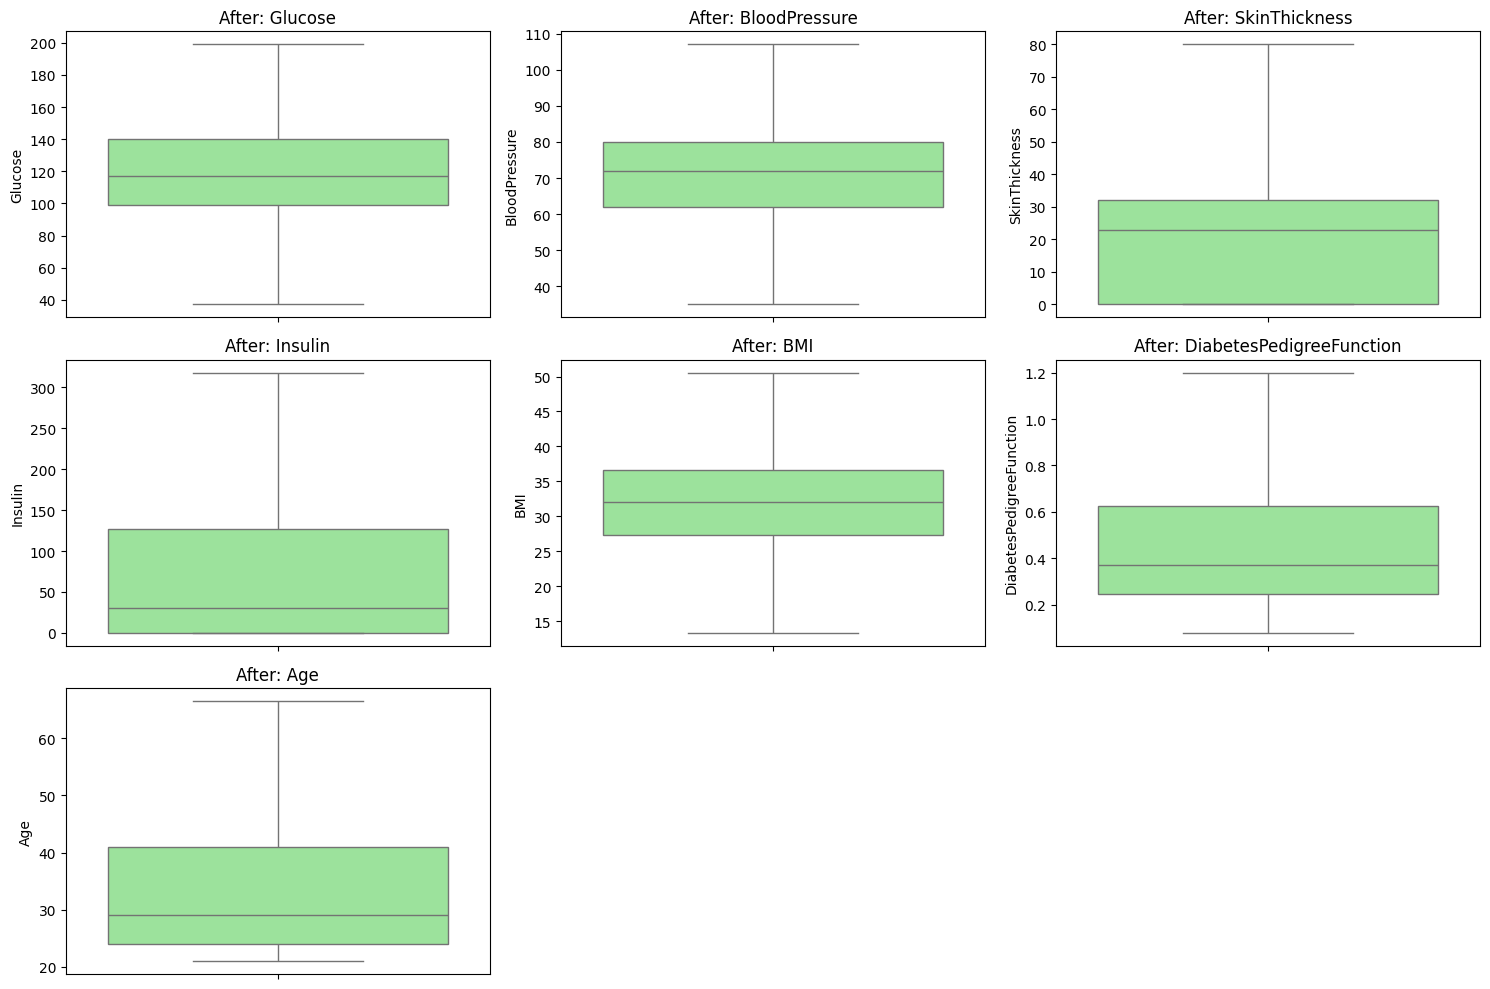

In [86]:
# Box plots after handling outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df_cleaned[col], color='lightgreen')
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

Normalization and Standraization 

In [52]:

print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Feature	                                    Method
Glucose, Blood Pressure, BMI	            Min-Max Scaling (0 to 1)
Age, Insulin, Diabetes PedigreeFunction	    Z-score Standardization


In [60]:
# Min-Max Scaling function
def min_max_scaling(column):
    return (column - column.min()) / (column.max() - column.min())

# Apply Min-Max Scaling to selected columns
columns_to_scale = ['Glucose', 'BloodPressure', 'BMI']
df[columns_to_scale] = df[columns_to_scale].apply(min_max_scaling)
# Check min and max values after Min-Max Scaling
print(df[columns_to_scale].describe())



          Glucose  BloodPressure         BMI
count  768.000000     768.000000  768.000000
mean     0.607510       0.566438    0.476790
std      0.160666       0.158654    0.117499
min      0.000000       0.000000    0.000000
25%      0.497487       0.508197    0.406855
50%      0.587940       0.590164    0.476900
75%      0.704774       0.655738    0.545455
max      1.000000       1.000000    1.000000


In [62]:
# Z-score Standardization function
def z_score_standardization(column):
    return (column - column.mean()) / column.std()

# Apply Z-score to selected columns
columns_to_standardize = ['Age', 'Insulin', 'DiabetesPedigreeFunction']
df[columns_to_standardize] = df[columns_to_standardize].apply(z_score_standardization)
# Check mean and standard deviation after Z-score Standardization
print(df[columns_to_standardize].mean())  # Should be close to 0
print(df[columns_to_standardize].std())   # Should be close to 1


Age                        -5.782412e-18
Insulin                    -1.966020e-17
DiabetesPedigreeFunction    1.387779e-17
dtype: float64
Age                         1.0
Insulin                     1.0
DiabetesPedigreeFunction    1.0
dtype: float64


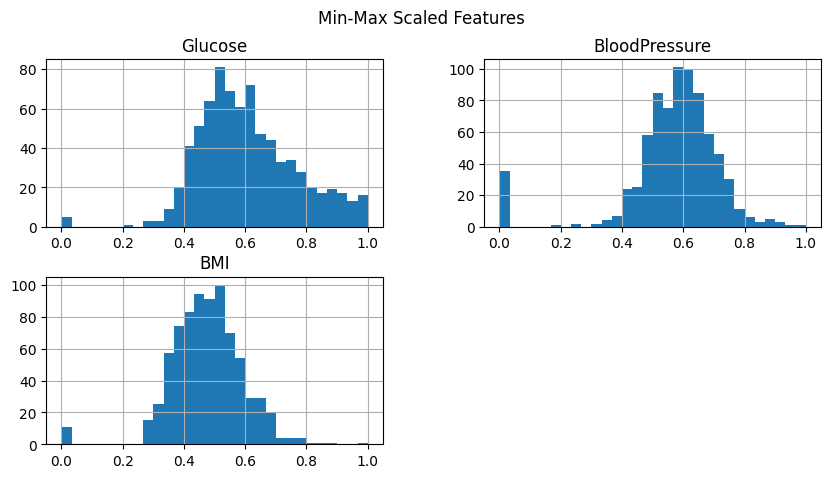

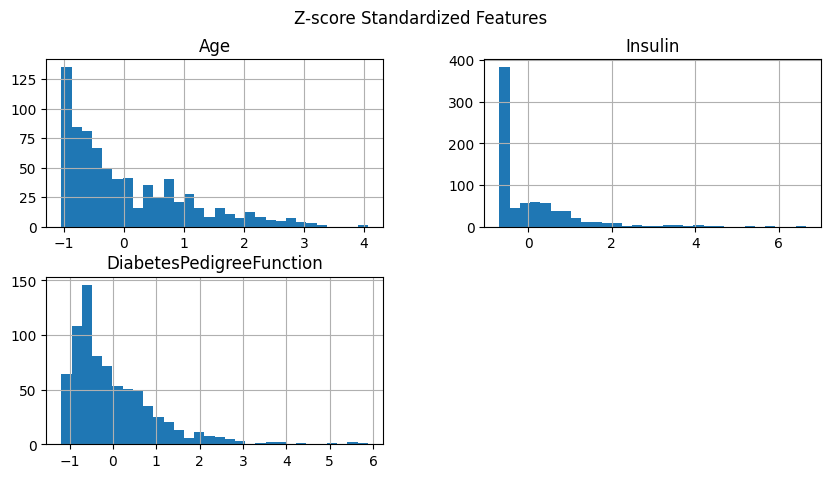

In [93]:


df[columns_to_scale].hist(figsize=(10, 5), bins=30)
plt.suptitle("Min-Max Scaled Features")
plt.show()

df[columns_to_standardize].hist(figsize=(10, 5), bins=30)
plt.suptitle("Z-score Standardized Features")
plt.show()


Splitting data 90/10

In [65]:
# Convert DataFrame to NumPy array for manual splitting
data = df.values  

# Shuffle data randomly
np.random.seed(42)  # Ensures reproducibility
np.random.shuffle(data)

# Define split index (90% train, 10% test)
split_index = int(0.9 * len(data))

# Split into training and testing sets
train_data, test_data = data[:split_index], data[split_index:]

# Separate features (X) and target (y)
X_train, y_train = train_data[:, :-1], train_data[:, -1]  # Last column is the target
X_test, y_test = test_data[:, :-1], test_data[:, -1]

# Verify sizes
print(f"Training set size: {X_train.shape}, {y_train.shape}")
print(f"Testing set size: {X_test.shape}, {y_test.shape}")

Training set size: (691, 8), (691,)
Testing set size: (77, 8), (77,)


Logistic Regression

In [67]:
# 1. Sigmoid Function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 2. Cost Function (Log-Loss)
def compute_cost(X, y, w, b):
    m = len(y)
    # Predicted probabilities
    y_hat = sigmoid(np.dot(X, w) + b)
    cost = - (1 / m) * np.sum(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    return cost

In [68]:
# 3. Gradient Descent (Update Weights and Bias)
def gradient_descent(X, y, w, b, learning_rate, epochs):
    m = len(y)
    for epoch in range(epochs):
        # Predicted probabilities
        y_hat = sigmoid(np.dot(X, w) + b)
        
        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)
        
        # Update weights and bias
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Optionally print the cost every 100 epochs
        if epoch % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Epoch {epoch} | Cost: {cost}")
    return w, b

In [69]:
# 4. Prediction
def predict(X, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)
    return np.round(y_hat)  # Return binary predictions (0 or 1)

In [70]:
# 5. Logistic Regression Model
def logistic_regression(X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=1000):
    # Initialize weights and bias
    w = np.zeros(X_train.shape[1])  # Weights initialized to zeros
    b = 0  # Bias initialized to zero
    
    # Train the model using gradient descent
    w, b = gradient_descent(X_train, y_train, w, b, learning_rate, epochs)
    
    # Evaluate the model
    y_pred_train = predict(X_train, w, b)
    y_pred_test = predict(X_test, w, b)
    
    # Accuracy calculation
    train_accuracy = np.mean(y_pred_train == y_train) * 100
    test_accuracy = np.mean(y_pred_test == y_test) * 100
    
    print(f"Training Accuracy: {train_accuracy}%")
    print(f"Testing Accuracy: {test_accuracy}%")
    
    return w, b, y_pred_train, y_pred_test

Testing

In [71]:
# Call logistic regression with your training and testing data
w, b, y_pred_train, y_pred_test = logistic_regression(X_train, y_train, X_test, y_test)


Epoch 0 | Cost: 0.6807992441985599
Epoch 100 | Cost: 0.6456332618050696
Epoch 200 | Cost: 0.629024669034162
Epoch 300 | Cost: 0.6186114241185982
Epoch 400 | Cost: 0.6118232585603885
Epoch 500 | Cost: 0.6072097460804134
Epoch 600 | Cost: 0.6039364655638397
Epoch 700 | Cost: 0.6015107145483309
Epoch 800 | Cost: 0.5996339437024563
Epoch 900 | Cost: 0.5981208982267814
Training Accuracy: 66.28075253256151%
Testing Accuracy: 66.23376623376623%


In [78]:
# Function to compute the confusion matrix
def confusion_matrix(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))
    return TP, TN, FP, FN
# Function to print confusion matrix
def print_confusion_matrix(TP, TN, FP, FN):
    print(f"Confusion Matrix:")
    print(f"TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}")
    print(f"TP + FP = {TP + FP}")
    print(f"TP + FN = {TP + FN}")

In [79]:
# Function to compute Precision, Recall, F1-score
def precision_recall_f1(TP, TN, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return precision, recall, f1_score

# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    TP, TN, FP, FN = confusion_matrix(y_true, y_pred)
    
    # Print confusion matrix
    print_confusion_matrix(TP, TN, FP, FN)
    
    # Precision, Recall, F1-score
    precision, recall, f1 = precision_recall_f1(TP, TN, FP, FN)
    
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

In [80]:
# Example usage with your test predictions
evaluate_model(y_test, y_pred_test)


Confusion Matrix:
TP = 6, TN = 45, FP = 5, FN = 21
TP + FP = 11
TP + FN = 27
Precision: 0.5455
Recall: 0.2222
F1-Score: 0.3158


Epoch 0 | Cost: 0.6924204574343904
Epoch 100 | Cost: 0.6756211133634183
Epoch 200 | Cost: 0.6656729476395682
Epoch 300 | Cost: 0.6579375464808978
Epoch 400 | Cost: 0.6518618716154478
Epoch 500 | Cost: 0.6470330359974771
Epoch 600 | Cost: 0.6431434639191657
Epoch 700 | Cost: 0.639963956463152
Epoch 800 | Cost: 0.6373233923937148
Epoch 900 | Cost: 0.6350936452411503
Training Accuracy: 65.41244573082489%
Testing Accuracy: 67.53246753246754%


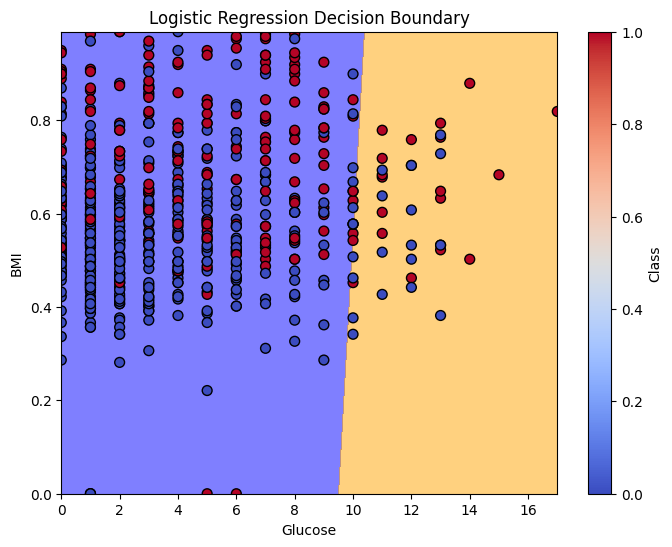

In [88]:


# Select two features for the 2D plot
X_train_2d = X_train[:, [0, 1]]  # Select 'Glucose' and 'BMI' columns (for example)
X_test_2d = X_test[:, [0, 1]]

# Train the logistic regression model on the 2D data
w, b, _, _ = logistic_regression(X_train_2d, y_train, X_test_2d, y_test, learning_rate=0.01, epochs=1000)

# Create a meshgrid to plot the decision boundary
xx, yy = np.meshgrid(np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100),
                     np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100))

# Compute the decision boundary using the learned weights and bias
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], colors=['blue', 'orange'], alpha=0.5)

# Plot the training data points
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', edgecolors='k', s=50)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.colorbar(label='Class')
plt.show()

